In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import r2_score
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression, Ridge, Lasso


In [3]:
# Surpress globally the use of exponential numbers
pd.options.display.float_format = '{:.4f}'.format

# #feature_importance.round(3) or do it manually with this code

In [4]:
dataset_path_USA = os.path.join('../../datasets/USA_houseprices_2014/')
file_name_USA = 'preprocessed_data_USAhouseprices2014.csv'
df = pd.read_csv(dataset_path_USA + file_name_USA)

X = df.drop(['price'], axis = 1)
y = df['price']

13 features, reduction of 0.00%


Text(0.5, 1.0, 'Feature Weights for USA Housing Dataset')

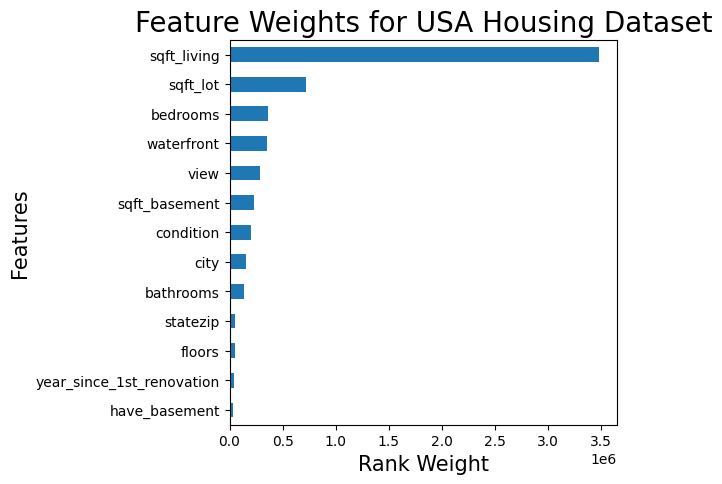

In [6]:
from sklearn.linear_model import RidgeCV

cv_model = RidgeCV(alphas = (0.1, 1.0, 10.0, 100.0), fit_intercept=True, cv=5)

cv_model.fit(X, y)

model = Ridge(alpha = cv_model.alpha_, fit_intercept=True, random_state=42)
model.fit(X, y)

feature_importance_USA = pd.Series(index = X.columns, data = np.abs(model.coef_))

n_selected_features = (feature_importance_USA>0).sum()
print('{0:d} features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(feature_importance_USA))*100))

feature_importance_USA.sort_values().tail(30).plot(kind = 'barh', figsize = (5,5))
plt.ylabel('Features', fontsize = 15)
plt.xlabel('Rank Weight', fontsize = 15)
plt.title('Feature Weights for USA Housing Dataset', fontsize = 20)